<a href="https://colab.research.google.com/github/jyotiraj-code/dissertation/blob/main/Quantum_Circuits_as_Tensor_Network_(Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install quimb --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.8/177.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.1 MB/s eta 0:00:00


Let's create a 80 qubit GHZ state using ordered sequence of CNOTs:

In [ ]:
%config InlineBackend.figure_formats = ['svg']

import random
import quimb as qu
import quimb.tensor as qtn

N = 80 #Number of qubits
qc = qtn.Circuit(N)

#Permutate the order of the qubits
regs = list(range(N))
random.shuffle(regs)

#Applying Hadamard on the qubits
qc.apply_gate('H', regs[0])

#CNOTs to generate the GHZ state
for i in range(N-1):
  qc.apply_gate('CNOT', regs[i], regs[i+1])

qc.apply_gate('X', regs[-1], control = regs[:-1])

for b in qc.sample(1):
  print(b)


/usr/local/lib/python3.10/dist-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


11111111111111111111111111111111111111111111111111111111011111111111111111111111


Creating a singlet state in tensor networks

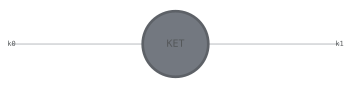

None

[[ 0.        +0.j  0.70710678+0.j]
 [-0.70710678+0.j  0.        +0.j]]

Tensor(shape=(2, 2), inds=('k0', 'k1'), tags=oset(['KET']), backend='numpy', dtype='complex128')


In [ ]:
%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn

data = qu.bell_state('psi-').reshape(2,2)

inds = ('k0', 'k1')

tags = ('KET',)

ket = qtn.Tensor(data = data,  inds = inds, tags = tags)

display(ket.draw())

print(ket.data)
print()
print(ket)

Let's create the bra operator using the tensor networks

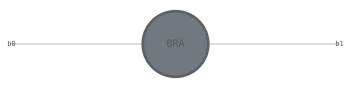

None

[[ 0.19903801+0.34101231j -0.17427552-0.26611613j]
 [ 0.3967061 +0.43796944j  0.56856502+0.26541587j]]

Tensor(shape=(2, 2), inds=('b0', 'b1'), tags=oset(['BRA']), backend='numpy', dtype='complex128')


In [ ]:
X = qtn.Tensor(qu.pauli('X'), inds = ('k0', 'b0'), tags = ['PAULI', 'X', 0])
Y = qtn.Tensor(qu.pauli('Y'), inds = ('k1', 'b1'), tags = ['PAULI', 'Y', 1])

bra = qtn.Tensor(qu.rand_ket(4).reshape(2, 2), inds=('b0', 'b1'), tags=['BRA'])

display(bra.draw())

print(bra.data)
print()
print(bra)

Now lets create the tensor networks which is basically the

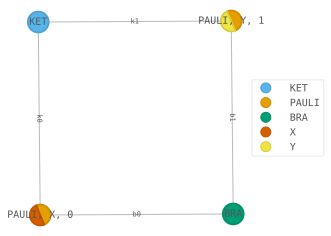

None

In [ ]:
TN = ket.H & X & Y & bra
display(TN.draw(color=['KET', 'PAULI', 'BRA', 'X', 'Y'], figsize=(4, 4), show_inds='all'))

There is this another method called as the Graph Oriented Tensor Network Creation where we will first create the nodes and then connect the edges with the proper indices

/usr/local/lib/python3.10/dist-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


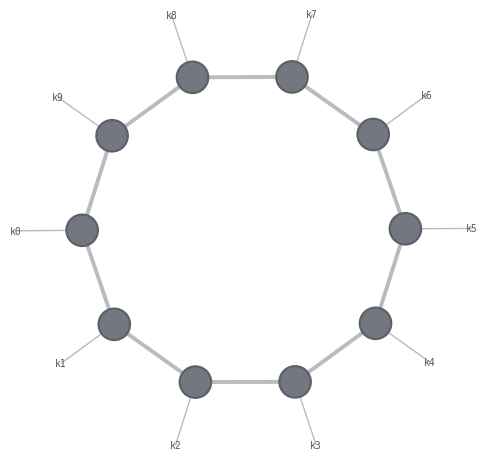

In [ ]:
L = 10
import quimb as qu
import quimb.tensor as qtn
# create the nodes, by default just the scalar 1.0
tensors = [qtn.Tensor() for _ in range(L)]

for i in range(L):
    # add the physical indices, each of size 2
    tensors[i].new_ind(f'k{i}', size=2)

    # add bonds between neighbouring tensors, of size 7
    tensors[i].new_bond(tensors[(i + 1) % L], size=7)

mps = qtn.TensorNetwork(tensors)
mps.draw()

Tensor(shape=(2, 4), inds=('a', 'b'), tags=oset(['A', 'B']), backend='numpy', dtype='float64')


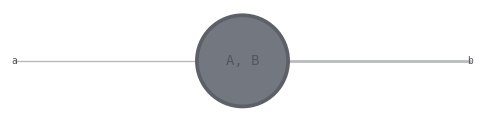

None

In [ ]:
ta = qtn.rand_tensor([2,3],inds = ['a','x'], tags = 'A')
tb = qtn.rand_tensor([4,3], inds = ['b', 'x'], tags = 'B')

print(ta @ tb)
display((ta @ tb).draw())


In [ ]:
# To show that TrA_dagger A is forbenius norm squared

psi = qtn.MPS_rand_state(10, 7)

psi.H @ psi

1.0

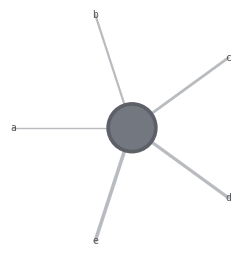

In [ ]:
t = qtn.rand_tensor([2,3,4,5,6], inds = ['a', 'b', 'c', 'd', 'e'])
t.draw(figsize = (3,3))


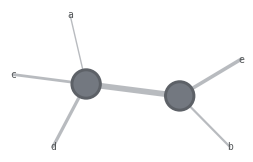

In [ ]:
#Now we can do splitting and create another tensor for the left

tn = t.split(['a','c','d'])
tn.draw(figsize = (3,3))

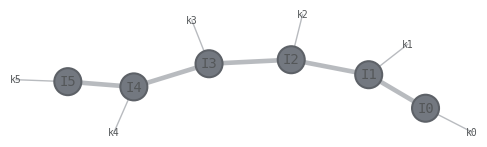

'Often it is convenient to perform a decomposition within a tensor network, \nhere we decompose a central tensor of an MPS,\n introducing a new tensor that will sit on the bond'

In [ ]:
psi = qtn.MPS_rand_state(6,10)
psi.draw()

"""Often it is convenient to perform a decomposition within a tensor network,
here we decompose a central tensor of an MPS,
 introducing a new tensor that will sit on the bond"""

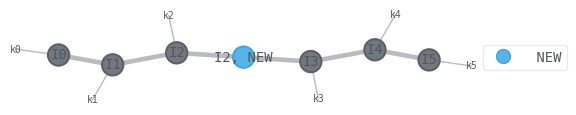

None

In [ ]:
psi.split_tensor(
    #Identify the tags
    tags = 'I2',
    #Identify the indices and we can use either left or right or both
    left_inds = None,
    right_inds = [psi.bond(2,3)],

    #Giving the new indice a name or a tag
    rtags = 'NEW',
)

display(psi.draw('NEW'))

Let's look at the example of gauging

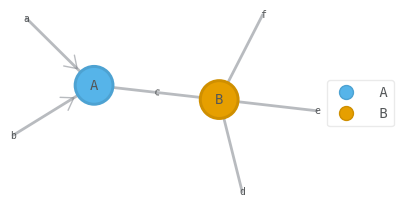

In [ ]:
ta = qtn.rand_tensor([4,4,4], inds= ['a', 'b','c'], tags = 'A')
# ta = qtn.rand_tensor([4,4,4],['a', 'b','c'],'A')
tb = qtn.rand_tensor([4,4,4,4], inds = ['c', 'd', 'e', 'f'], tags = 'B')
qtn.tensor_canonize_bond(ta,tb)
(ta | tb).draw(['A', 'B'], figsize=(4, 4), show_inds='all')

There is another way we can achieve the decomposition using the compressing

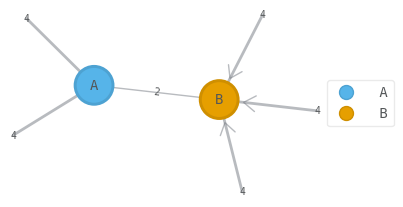

In [ ]:
ta = qtn.rand_tensor([4,4,4], inds= ['a', 'b','c'], tags = 'A')
# ta = qtn.rand_tensor([4,4,4],['a', 'b','c'],'A')
tb = qtn.rand_tensor([4,4,4,4], inds = ['c', 'd', 'e', 'f'], tags = 'B')
# qtn.tensor_compress_bond(ta, tb, max_bond = 2, absorb = 'right')
qtn.tensor_compress_bond(ta, tb, max_bond = 2, absorb = 'left')
(ta | tb).draw(['A', 'B'], figsize=(4, 4), show_inds='bond-size')

To use the Selection method for creating new regions based on the tags

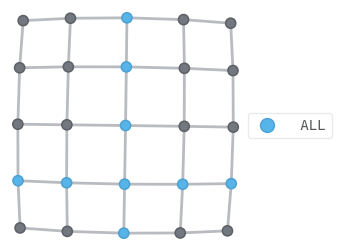

In [ ]:
tn = qtn.TN2D_rand(5,5, D = 4)

tn.select(tags=['X2', 'Y3'], which='any').add_tag('ALL')
tn.draw('ALL', figsize=(3, 3))

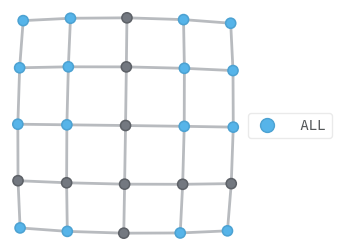

In [ ]:
tn = qtn.TN2D_rand(5,5, D = 4)

tn.select(tags=['X2', 'Y3'], which='!any').add_tag('ALL')
tn.draw('ALL', figsize=(3, 3))

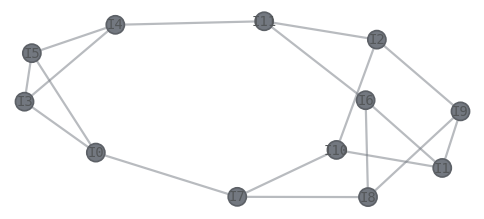

In [ ]:
tn = qtn.TN_rand_reg(12, 3, 3, seed=42)
tn.draw()

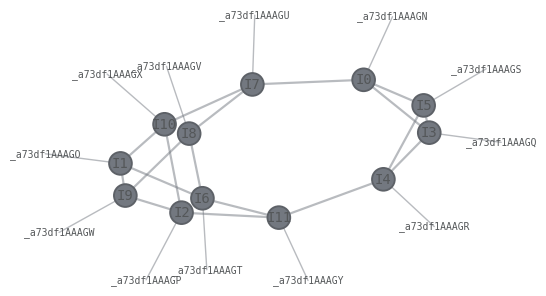

In [ ]:
# add a random dangling index to each tensor
for t in tn:
    t.new_ind(qtn.rand_uuid(), size=2)

tn.draw()

In [ ]:
# the TN efficiently keeps track of all indices and tags still
tn.outer_inds()

('_a73df1AAAGN',
 '_a73df1AAAGO',
 '_a73df1AAAGP',
 '_a73df1AAAGQ',
 '_a73df1AAAGR',
 '_a73df1AAAGS',
 '_a73df1AAAGT',
 '_a73df1AAAGU',
 '_a73df1AAAGV',
 '_a73df1AAAGW',
 '_a73df1AAAGX',
 '_a73df1AAAGY')

## Optimization

Let's start with the optimization steps, we will look at the different optimization for 1) Normal optimization, 2) PTensor and 3) Circuit objects


In [ ]:
%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn

/usr/local/lib/python3.10/dist-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [ ]:
L = 64
D = 16
pbc = True


#Creating a random MPS state to optimize
psi = qtn.MPS_rand_state(L, bond_dim = D, cyclic = pbc)

#Creating the MPO of the hamiltonian
ham = qtn.MPO_ham_heis(L, cyclic = pbc)


#Creating the definition for the normalization function and the loss function





## Pennylane method (first doing the quimb method)

Let's move from the documentation of quimb and let's look at the circuit simulatiion using the pennylane module for the default tensor

In [ ]:
#The default tensor can either use the MPS or the TN method, the default one is the MPS
#MPS method is a particular case of the Tensor Network (TN) where we consider a 1D structure

## Quimb method

We will be simulating the Quantum Fourier Transform using the quimb.
- First, we will create a qft rotation function
- Second, we will create a swap function
- Third, we will combine both the steps in a qft function which can be used in the general case

In [ ]:
!pip install quimb --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.8/177.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.4 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/jcmgray/quimb.git
!pip install --no-deps -U -e quimb/

Cloning into 'quimb'...
remote: Enumerating objects: 14422, done.
remote: Counting objects: 100% (4316/4316), done.
remote: Compressing objects: 100% (980/980), done.
remote: Total 14422 (delta 3562), reused 4011 (delta 3314), pack-reused 10106 (from 1)
Receiving objects: 100% (14422/14422), 35.09 MiB | 20.19 MiB/s, done.
Resolving deltas: 100% (11260/11260), done.
Obtaining file:///content/quimb
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for quimb (pyproject.toml) ... done
  Created wheel for quimb: filename=quimb-1.8.5.dev8+g7cd4f4a-0.editable-py3-none-any.whl size=6476 sha256=bf9fcd0f09f97f1032515e25c5f5663fc1df976001eb446496376d71bdb79b42
  Stored in directory: /tmp/pip-ephem-wheel-cache-os9qhy_j/wheels/b2/da/18/ba79857cff6920cfc4392950b94bd2bc0edded2977a4832919
Successfully built quimb
  Attempting 

In [ ]:
#Checking the versions
!pip install -r requirements.txt

ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement numba==0.53 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0.24.0, 0.25.0, 0.26.0, 0.27.0, 0.28.1, 0.29.0, 0.30.0, 0.30.1, 0.31.0, 0.32.0, 0.33.0, 0.34.0, 0.35.0, 0.36.1, 0.36.2, 0.37.0, 0.38.0, 0.38.1, 0.39.0

In [ ]:
!pip install python
!pip install numpy
!pip install scipy
!pip install cytoolz
!pip install tqdm
!pip install psutil
!pip install cotengra
!pip install autoray

ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.8/177.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install numba==0.55.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 48.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
      Successfully uninstalled numba-0.60.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed

In [ ]:
!git clone https://github.com/jcmgray/quimb.git
!pip install --no-deps -U -e quimb/

Cloning into 'quimb'...
remote: Enumerating objects: 14422, done.
remote: Counting objects: 100% (4238/4238), done.
remote: Compressing objects: 100% (905/905), done.
remote: Total 14422 (delta 3491), reused 4004 (delta 3311), pack-reused 10184 (from 1)
Receiving objects: 100% (14422/14422), 35.09 MiB | 17.82 MiB/s, done.
Resolving deltas: 100% (11266/11266), done.
Obtaining file:///content/quimb
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for quimb (pyproject.toml) ... done
  Created wheel for quimb: filename=quimb-1.8.5.dev8+g7cd4f4a-0.editable-py3-none-any.whl size=6476 sha256=e3c08ed076dfa9447be6f0ae5ffe49ec409fa40a4ca9de2359a82acafad4b825
  Stored in directory: /tmp/pip-ephem-wheel-cache-qpztcsgn/wheels/b2/da/18/ba79857cff6920cfc4392950b94bd2bc0edded2977a4832919
Successfully built quimb


In [ ]:

%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn

ModuleNotFoundError: No module named 'quimb.tensor'

In [ ]:
!pip install quimb --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 919.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 27.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
albumentations 1.4.14 requires numpy>=1.24.4, but you have numpy 1.21.6 which is incompatible.
arviz 0.18.0 requires numpy<2.0,>=1.23.0, but you have numpy 1.21.6 which is incompatible.
jax 0.4.26 requires numpy>=1.22

In [ ]:
# Defining the QFT Rotations
def qft_rotations(circuit, n):
  if n == 0:
    return circuit
  n -= 1
  circuit.apply_gate("H", n, gate_round = None)
  for qubit in range(n):
    circuit.apply_gate('CPHASE', lamda = np.pi/2**(n-qubit), i = qubit, j = n, gate_round = None)

n = 4
qc = qtn.Circuit(n)
qft_rotations(qc, n)
qc.psi.draw()

NameError: name 'qtn' is not defined